<a href="https://colab.research.google.com/github/anitakumar/argocd-example-apps/blob/master/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()



In [4]:
pd=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
import pandas as pd # Make sure you import the pandas module

df = pd.DataFrame(cancer['data'],columns=cancer['feature_names']) # Use pd to refer to the pandas module
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
from os import X_OK
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_train,X_test,y_train,y_test=train_test_split(df,cancer['target'],test_size=0.2,random_state=0)
#

In [19]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [20]:
pca=PCA(n_components=2)

In [21]:

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [22]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.43430767, 0.19740115])

In [23]:
cum_sum_eiganvalues = np.cumsum(exp_var)
cum_sum_eiganvalues

array([0.43430767, 0.63170882])

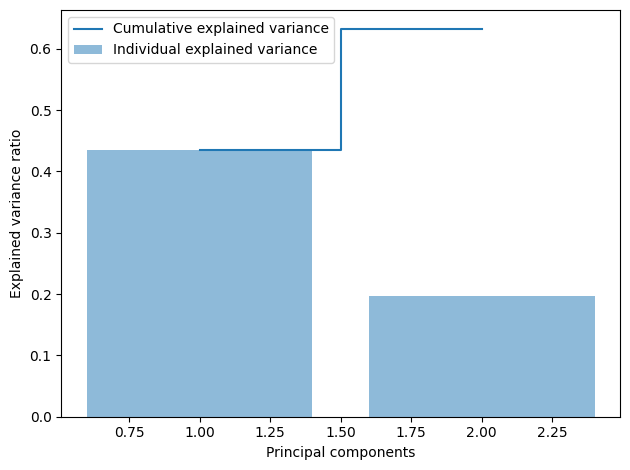

In [24]:
# prompt: plot bar

import matplotlib.pyplot as plt
plt.bar(range(1, len(exp_var) + 1), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_sum_eiganvalues) + 1), cum_sum_eiganvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [26]:
pca.components_

array([[ 0.22151036,  0.10450507,  0.22951189,  0.22365223,  0.13994442,
         0.24178096,  0.25999119,  0.26333456,  0.13270016,  0.05850358,
         0.20695134,  0.01284976,  0.21007605,  0.20308114,  0.0158805 ,
         0.16511631,  0.14173528,  0.18073348,  0.03361713,  0.10290725,
         0.230248  ,  0.10553057,  0.23748257,  0.22734321,  0.12954467,
         0.20947161,  0.22958661,  0.25309767,  0.11974113,  0.13016752],
       [-0.22849614, -0.05304083, -0.21198379, -0.22578551,  0.17747368,
         0.14778482,  0.0637919 , -0.03408058,  0.19056224,  0.36115407,
        -0.10875906,  0.10096927, -0.10092794, -0.15143581,  0.20845567,
         0.23829333,  0.20962214,  0.14429893,  0.1829677 ,  0.28060436,
        -0.21506139, -0.03435232, -0.19941942, -0.21424804,  0.17169435,
         0.14470833,  0.10648885, -0.00189422,  0.1442728 ,  0.27514824]])